In [16]:
import numpy as np
import pandas as pd

# Import the datasets
amazon_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Term_reduced.csv')
amazon_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Bigram_reduced.csv')
amazon_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-Trigram_reduced.csv')
amazon_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/DTM/Amazon-4-gram_reduced.csv')

In [17]:
# Term training data and labels
X_train_term = amazon_term_training.iloc[:, :-1].values
y_train_term = amazon_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = amazon_2gram_training.iloc[:, :-1].values
y_train_2gram = amazon_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = amazon_3gram_training.iloc[:, :-1].values
y_train_3gram = amazon_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = amazon_4gram_training.iloc[:, :-1].values
y_train_4gram = amazon_4gram_training.iloc[:, -1].values

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Average accuracy: 0.598 (+- 0.041)


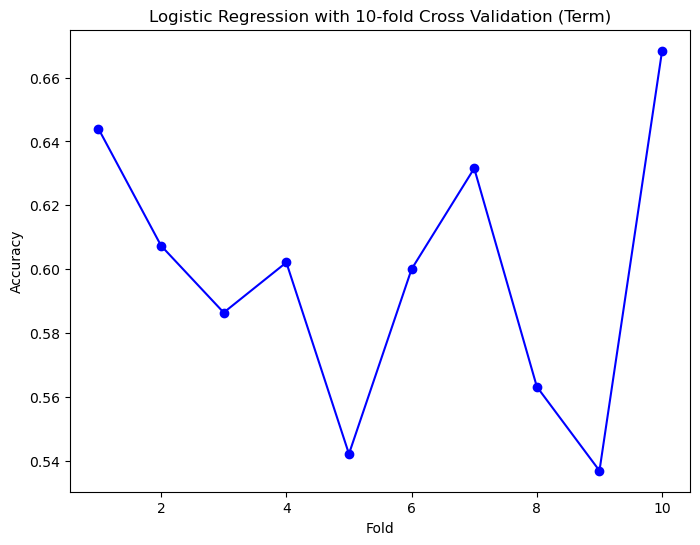

/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zijia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


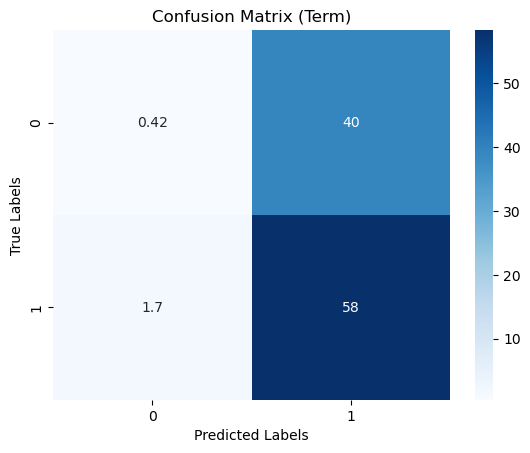

In [19]:
# model for term
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_term, y_train_term, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Term)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_term, y_train_term, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Term)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.645 (+- 0.038)


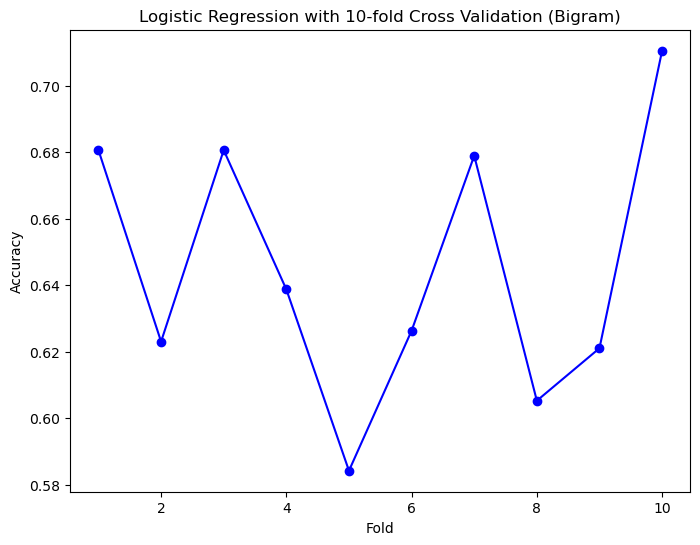

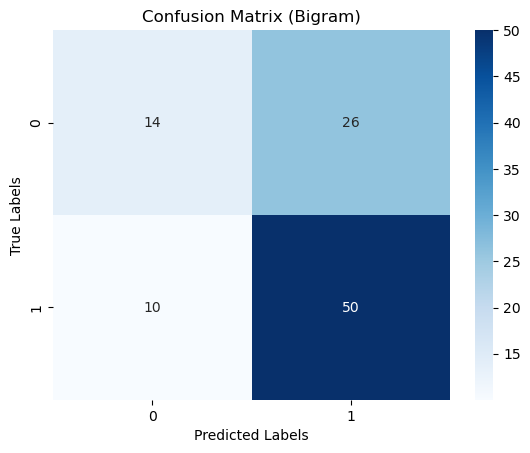

In [20]:
# model for bigram
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelBigram = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelBigram, X_train_2gram, y_train_2gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
# data viz for accuracy
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Bigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelBigram, X_train_2gram, y_train_2gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_2gram, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Bigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.651 (+- 0.042)


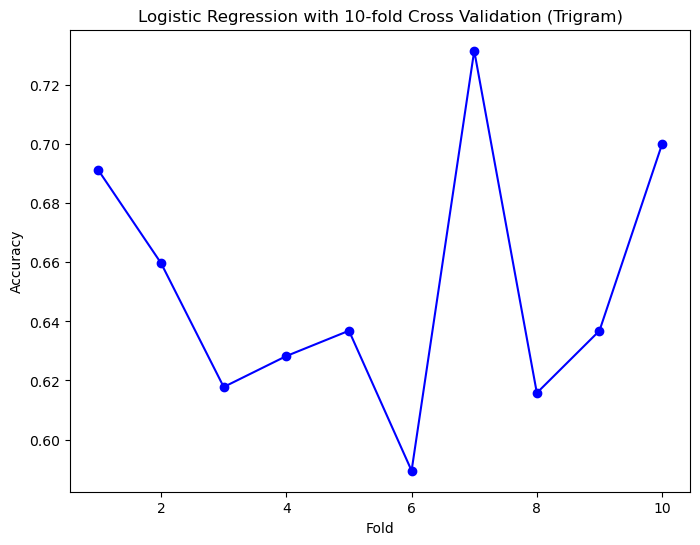

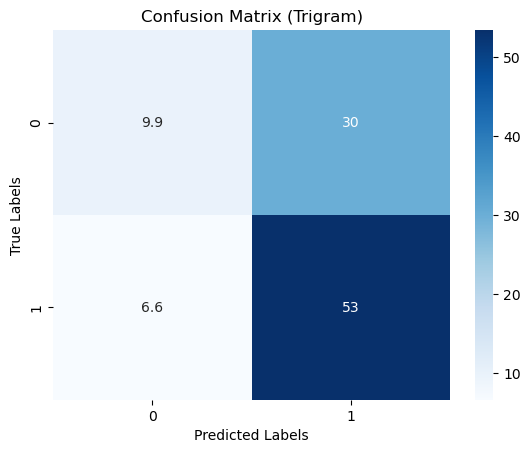

In [21]:
# model for 3gram
# Fit your model to the training data
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_3gram, y_train_3gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Trigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_3gram, y_train_3gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Trigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Average accuracy: 0.639 (+- 0.037)


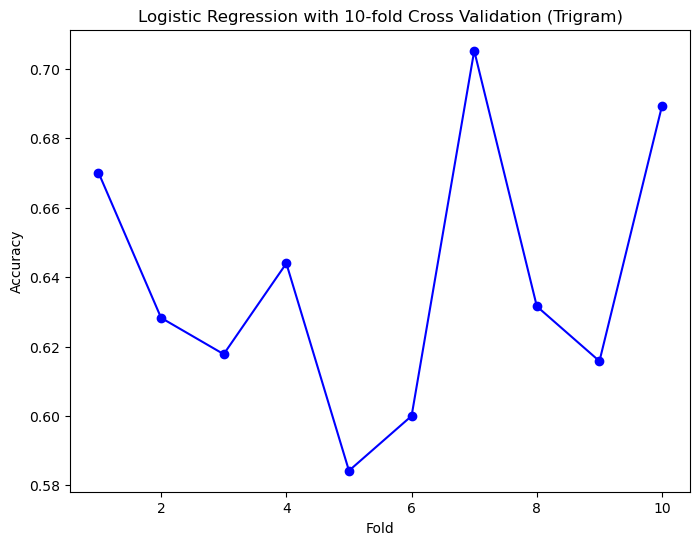

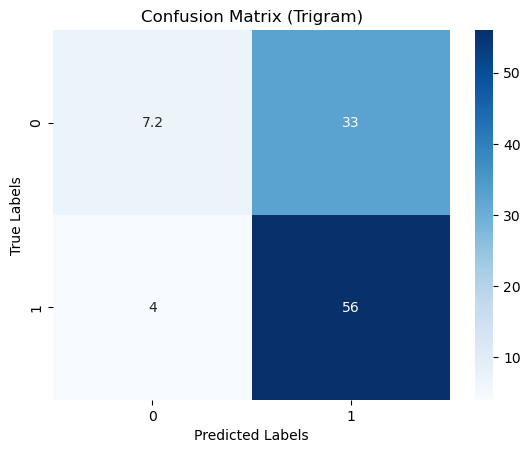

In [22]:
# model for 4-gram
k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
# create model
modelTerm = LogisticRegression(solver='saga', max_iter=3000)
# evaluate model
scores = cross_val_score(modelTerm, X_train_4gram, y_train_4gram, scoring='accuracy', cv=cv)
# report performance
print('Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, k+1), scores, '-o', color='blue')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression with {}-fold Cross Validation (Trigram)'.format(k))
plt.show()

# data viz for f1 matrix
y_pred = cross_val_predict(modelTerm, X_train_4gram, y_train_4gram, cv=k)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_train_term, y_pred)
conf_matrix_percent = np.round(conf_matrix / np.sum(conf_matrix) * 100, decimals=2)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues')
plt.title('Confusion Matrix (Trigram)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()